In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":[10,10]},font_scale=1.3)

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
import seaborn as sns

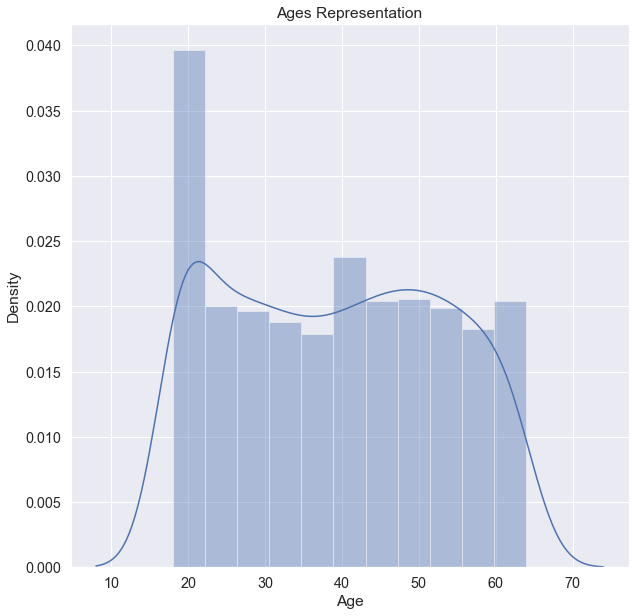

In [6]:
sns.distplot(df["age"],kde=True)
plt.xlabel("Age")
plt.title("Ages Representation")
plt.show()

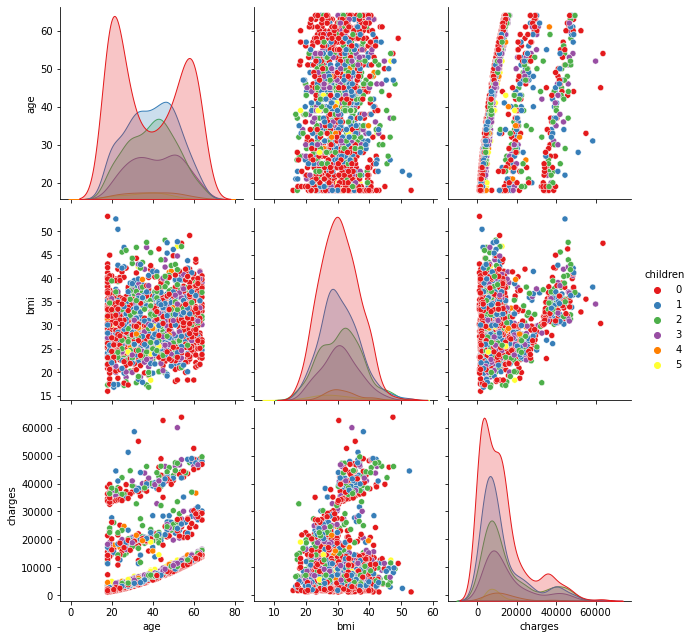

In [35]:
sns.pairplot(df[["age", "bmi", "charges", "children"]],
            hue = "children",
            height = 3,
            palette="Set1")

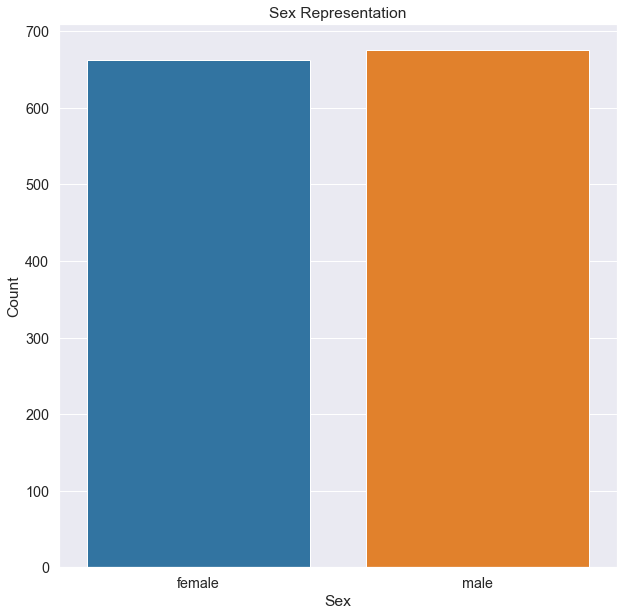

In [7]:
sns.countplot(data=df,x="sex",palette="tab10").set(xlabel="Sex",ylabel="Count")
plt.title("Sex Representation")
plt.show()

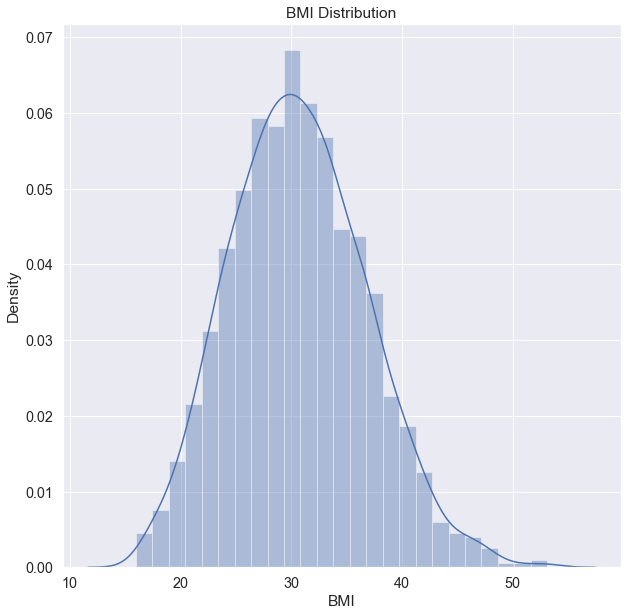

In [8]:
sns.distplot(df["bmi"],kde=True).set(xlabel="BMI")
plt.title("BMI Distribution")
plt.show()

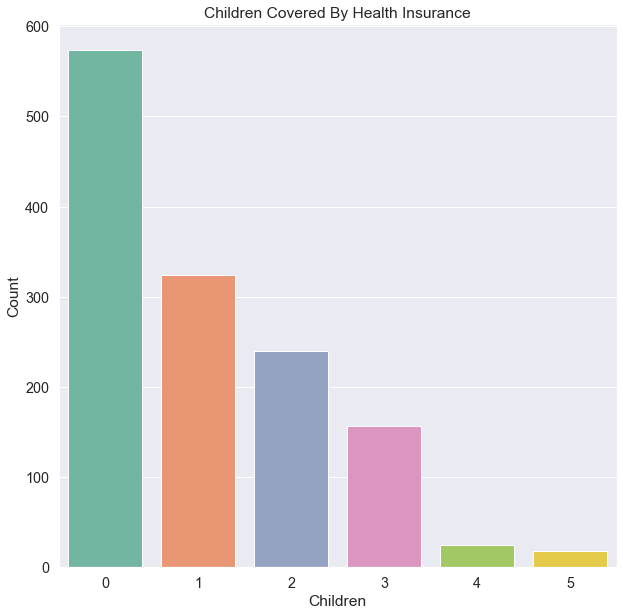

In [9]:
sns.countplot(data=df,x="children",palette="Set2").set(xlabel="Children",ylabel="Count")
plt.title("Children Covered By Health Insurance")
plt.show()

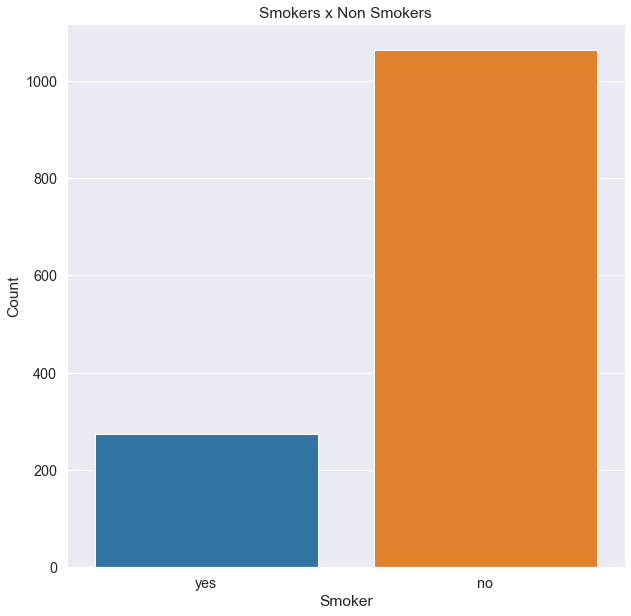

In [10]:
sns.countplot(df["smoker"],palette="tab10").set(xlabel="Smoker",ylabel="Count")
plt.title("Smokers x Non Smokers")
plt.show()

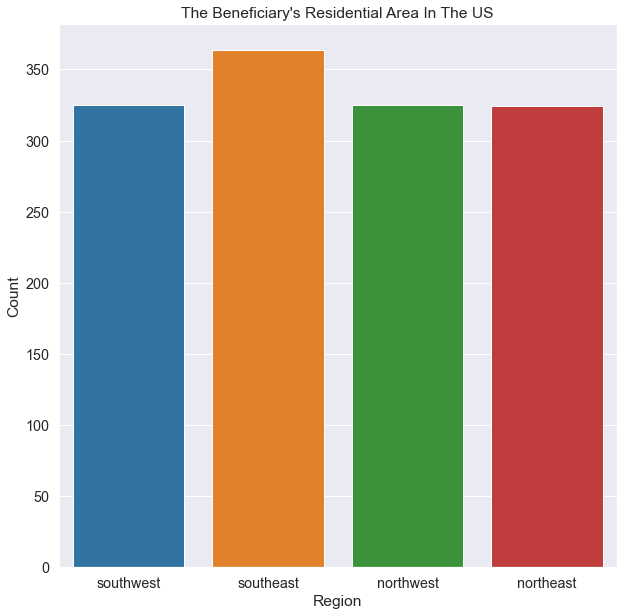

In [11]:
sns.countplot(df["region"],palette="tab10").set(xlabel="Region",ylabel="Count")
plt.title("The Beneficiary's Residential Area In The US")
plt.show()

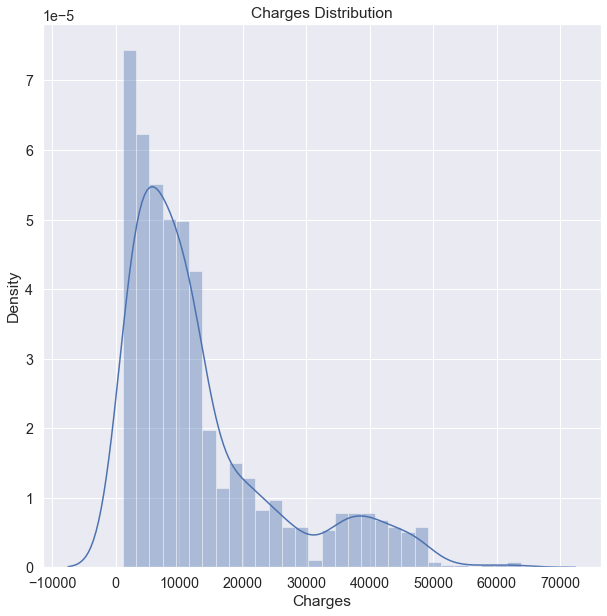

In [12]:
sns.distplot(df["charges"],kde=True).set(xlabel="Charges")
plt.title("Charges Distribution")
plt.show()

In [13]:
ideal_bmi=df[(df["bmi"]>=18.5) & (df["bmi"]<=24.9)]
ideal_bmi.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375


In [14]:
ideal_bmi["age"].value_counts().reset_index().rename(columns={"index":"Age","age":"Count"}).head()

,Age,Count
0,19,17
1,18,11
2,53,7
3,39,7
4,45,7


In [15]:
ideal_bmi[(ideal_bmi["age"]>=40) & (ideal_bmi["age"]>=60)]

,age,sex,bmi,children,smoker,region,charges
26,63,female,23.085,0,no,northeast,14451.83515
48,60,female,24.530,0,no,southeast,12629.89670
62,64,male,24.700,1,no,northwest,30166.61817
131,61,female,22.040,0,no,northeast,13616.35860
202,60,female,24.035,0,no,northwest,13012.20865
370,61,female,21.090,0,no,northwest,13415.03810
552,62,male,21.400,0,no,southwest,12957.11800
664,64,female,22.990,0,yes,southeast,27037.91410
717,60,male,24.320,1,no,northwest,13112.60480
824,60,male,24.320,0,no,northwest,12523.60480


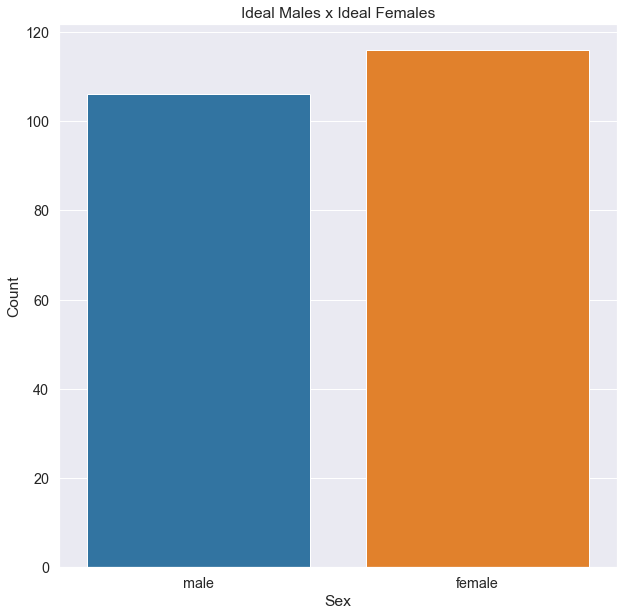

In [16]:
sns.countplot(data=ideal_bmi,x="sex",palette="tab10").set(xlabel="Sex",ylabel="Count")
plt.title("Ideal Males x Ideal Females")
plt.show()

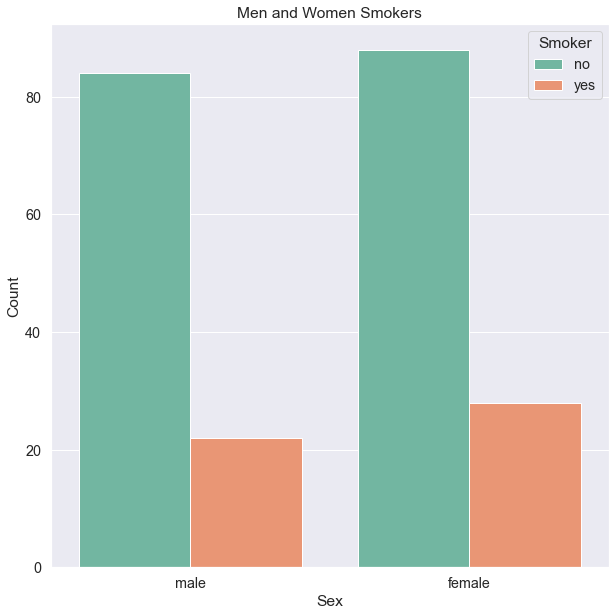

In [17]:
sns.countplot(data=ideal_bmi,x="sex",hue="smoker",palette="Set2").set(xlabel="Sex",ylabel="Count")
plt.legend(title="Smoker")
plt.title("Men and Women Smokers")
plt.show()

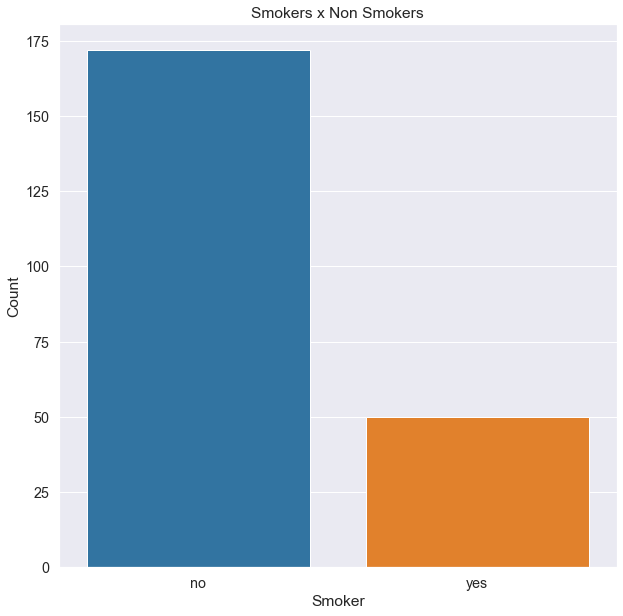

In [18]:
sns.countplot(data=ideal_bmi,x="smoker",palette="tab10").set(xlabel="Smoker",ylabel="Count")
plt.title("Smokers x Non Smokers")
plt.show()

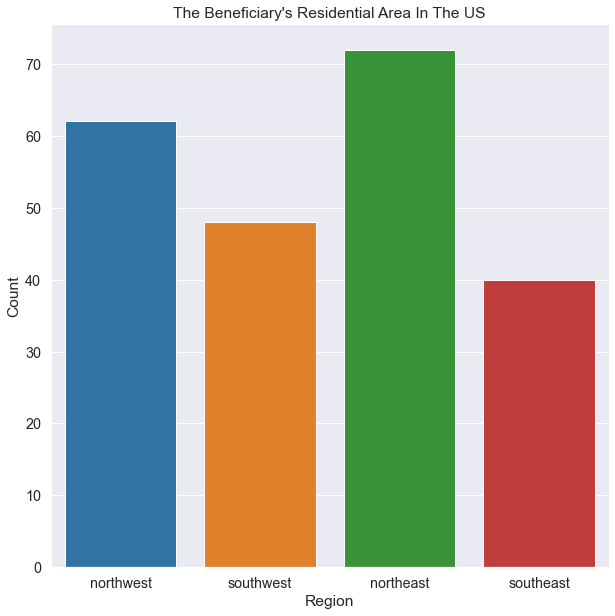

In [19]:
sns.countplot(data=ideal_bmi,x="region",palette="tab10").set(xlabel="Region",ylabel="Count")
plt.title("The Beneficiary's Residential Area In The US")
plt.show()

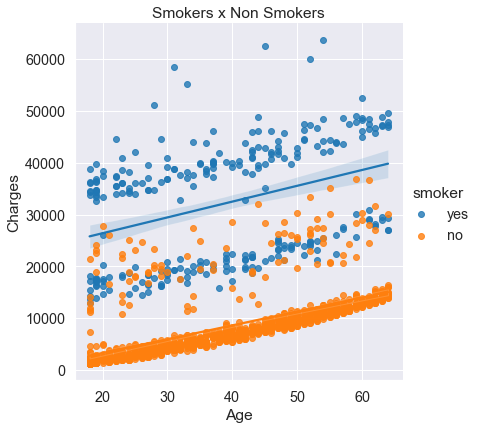

In [20]:
sns.lmplot(data=df,x="age",y="charges",hue="smoker",palette="tab10",size=6).set(xlabel="Age",ylabel="Charges")
plt.title("Smokers x Non Smokers")
plt.show()

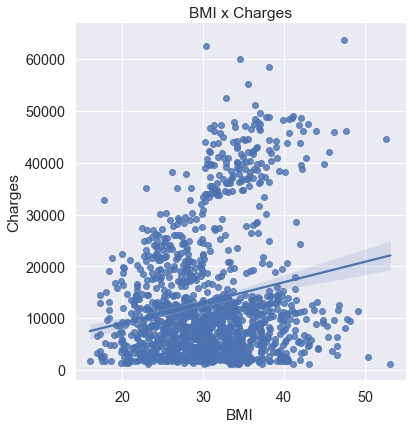

In [21]:
sns.lmplot(data=df,x="bmi",y="charges",size=6).set(xlabel="BMI",ylabel="Charges")
plt.title("BMI x Charges")
plt.show()

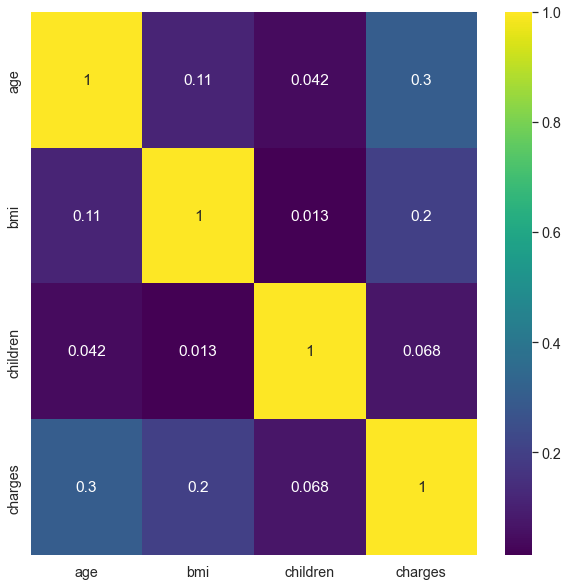

In [22]:
sns.heatmap(df.corr(),cmap="viridis",annot=True);

In [23]:
df.replace({"sex":{"male":1,"female":0}},inplace=True)
df.replace({"smoker":{"yes":1,"no":0}},inplace=True)
df.replace({"region":{"northeast":0,"northwest":1,"southeast":2,"southwest":3}},inplace=True)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [26]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [27]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [28]:
quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_quad,y,test_size=0.2,random_state=98)

In [29]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
model=LinearRegression()
model.fit(x_train,y_train)
print(f"Training score:{model.score(x_train,y_train)}")
print(f"Testing score:{model.score(x_test,y_test)}")

Training score:0.8477954217975672
Testing score:0.8367983033365337


In [31]:
y_pred=model.predict(x_test)
y_pred

array([16101.47466922, 13195.22244484,  5807.24008266, 16672.84884574,
        5531.91069574,  5260.75618397,  8649.84277227,  3482.59962516,
       13397.04190532, 10557.49750392,  7798.15107994, 13032.89960132,
        3177.55368362,  1514.2158618 , 50252.59199935, 27909.77085915,
       13198.56857287, 12874.32582283, 11240.8563059 , 12916.26965824,
        4229.07506821, 11754.5360801 , 14153.64806016, 14952.49095204,
        4141.52311643,  4471.86524243,  9187.4111869 ,  9050.03399488,
        2181.56064936, 11016.48953887, 12119.08509956, 12229.52393799,
        3224.39438013, 10585.45206052, 23470.92133751,  9124.02262919,
        8544.26984447, 10207.86174118,  6011.59561935,  6423.36724884,
       17950.97282948, 53344.34447459, 46168.91159763, 27808.62309097,
       13053.23169806, 14083.07088294,  8038.47151366,  8291.95381352,
        6350.03495572,  4676.98303955,  8305.49082779,  9958.44061006,
        2525.0858465 ,  3239.48936031, 10773.34042837,  7316.31837253,
      

In [32]:
y_test

1306    16115.30450
206     11743.29900
191      4883.86600
573     31620.00106
76       3947.41310
           ...     
759     36307.79830
1311     4571.41305
955      3875.73410
602     11070.53500
1332    11411.68500
Name: charges, Length: 268, dtype: float64

In [33]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

RMSE: 4778.95447843002


In [34]:
print(f"R2 for testing data:{r2_score(y_test,y_pred)}")

R2 for testing data:0.8367983033365337
